**2.1 TASK**

In [2]:
import numpy as np
import matplotlib.pyplot as plt   

In [3]:
data = np.load("Iris_data.npy")
labels = np.load("Iris_labels.npy")

**Iris data contains 150 samples with 4 features </br>
of length and width sepals and petals </br>
labels data includes 150 "0,1,2" 50 of each meaning that</br>
0 for setosa </br>
1 for versicolor </br>
2 for virginica </br>**

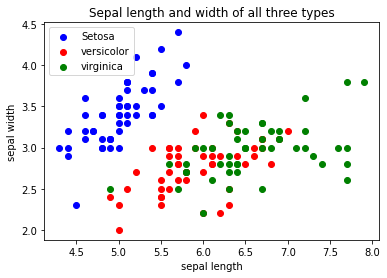

In [4]:
X = data
x_sepal = data
plt.figure () 
plt.scatter(x_sepal[:50,0], x_sepal [:50,1],color='blue', marker='o', label='Setosa')
plt.scatter(x_sepal[50:100,0], x_sepal [50:100,1],color='red', marker='o', label='versicolor')
plt.scatter(x_sepal[100:150,0], x_sepal [100:150,1],color='green', marker='o', label='virginica')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title('Sepal length and width of all three types')
plt.legend(loc='upper left')
plt.show()

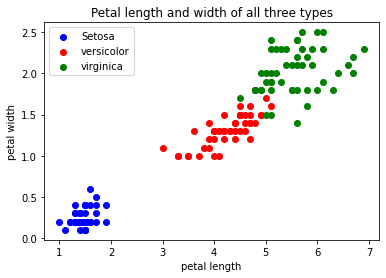

In [5]:
x_petal = data
plt.figure () 
plt.scatter(x_petal[:50,2], x_petal [:50,3],color='blue', marker='o', label='Setosa')
plt.scatter(x_petal[50:100,2], x_petal [50:100,3],color='red', marker='o', label='versicolor')
plt.scatter(x_petal[100:150,2], x_petal [100:150,3],color='green', marker='o', label='virginica')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title('Petal length and width of all three types')
plt.legend(loc='upper left')
plt.show()

**2.2 TASK**

**Applying kmeans to Iris data(creating kmeans classifier)**

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
'''
init - selects initial cluster centroids
n_init - number of time kmeans will be run
'''
sepal_kmeans = kmeans.fit_predict(x_sepal)
petal_kmeans = kmeans.fit_predict(x_petal)

**Plotting centroids**

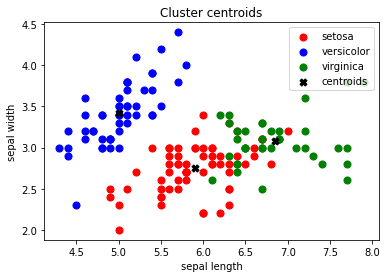

In [7]:
plt.scatter(x_sepal[sepal_kmeans == 0, 0], x_sepal[sepal_kmeans == 0,1], s = 50, c = 'red', label = 'setosa')
plt.scatter(x_sepal[sepal_kmeans == 1, 0], x_sepal[sepal_kmeans == 1,1], s = 50, c = 'blue', label = 'versicolor')
plt.scatter(x_sepal[sepal_kmeans == 2, 0], x_sepal[sepal_kmeans == 2,1], s = 50, c = 'green', label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, marker = 'X', c = 'black', label = 'centroids')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title('Cluster centroids')
plt.legend(loc = 'upper right')

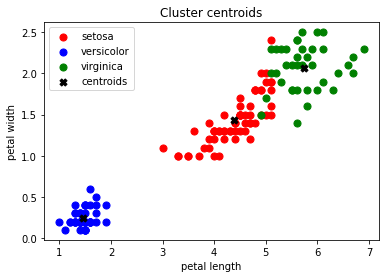

In [8]:
plt.scatter(x_petal[petal_kmeans == 0, 2], x_petal[petal_kmeans == 0,3], s = 50, c = 'red', label = 'setosa')
plt.scatter(x_petal[petal_kmeans == 1, 2], x_petal[petal_kmeans == 1,3], s = 50, c = 'blue', label = 'versicolor')
plt.scatter(x_petal[petal_kmeans == 2, 2], x_petal[petal_kmeans == 2,3], s = 50, c = 'green', label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 50, marker = 'X', c = 'black', label = 'centroids')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title('Cluster centroids')
plt.legend(loc = 'upper left')

**2.3 TASK**

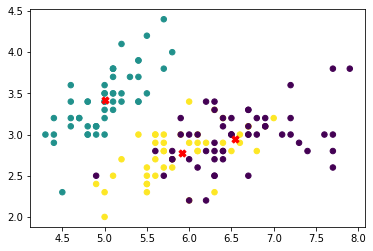

In [9]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components = 3).fit(x_sepal) #fit the model with iris data

# predict the cluster for each data point
y_cluster_gmm = GMM.predict(x_sepal)
z_cluster_gmm = GMM.predict(x_petal)
plt.scatter(x_sepal[:, 0], x_sepal[:, 1], c = y_cluster_gmm, s=30, cmap='viridis');
plt.scatter(GMM.means_[:,0], GMM.means_[:,1], s = 50, marker = 'X', c = 'red', label = 'centroids')

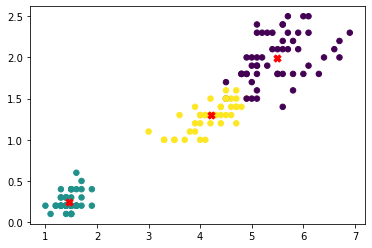

In [10]:
plt.scatter(x_petal[:, 2], x_petal[:, 3], c = z_cluster_gmm, s=30, cmap='viridis');
plt.scatter(GMM.means_[:,2], GMM.means_[:,3], s = 50, marker = 'X', c = 'red', label = 'centroids')

**Posterior probabilities for IRIS data**

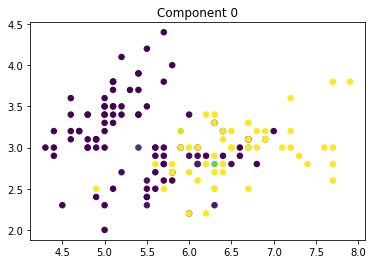

In [11]:
post_prob = GMM.predict_proba(X)
plt.title('Component 0')
plt.scatter(X[:, 0], X[:, 1], c = post_prob[:,0], s=30, cmap='viridis');


Text(0.5, 1.0, 'Component 1')

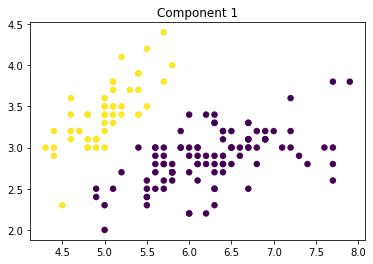

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = post_prob[:,1], s=30, cmap='viridis');
plt.title('Component 1')

Text(0.5, 1.0, 'Component 2')

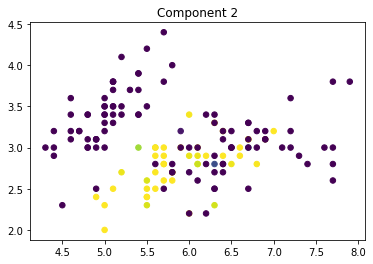

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = post_prob[:,2], s=30, cmap='viridis');
plt.title('Component 2')

**2.4 TASK**

(100, 10)


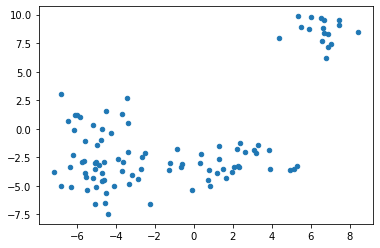

In [15]:
test_data = np.load("task2_4.npy")
print(test_data.shape)
plt.scatter(test_data[:,1], test_data[:,2], s = 20)


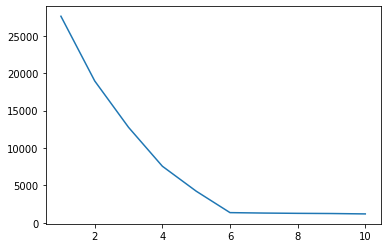

In [16]:
import seaborn as sns
inertion = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++")
  kmeans.fit(test_data)
  inertion.append(kmeans.inertia_)
number_of_clusters = [1,2,3,4,5,6,7,8,9,10]
sns.lineplot(x = number_of_clusters, y = inertion)


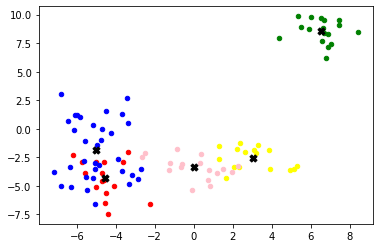

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 3000, n_init = 11)

centroids = kmeans.fit_predict(test_data)

plt.scatter(test_data[centroids == 0, 1], test_data[centroids == 0,2], s = 20, c = 'red')
plt.scatter(test_data[centroids == 1, 1], test_data[centroids == 1,2], s = 20, c = 'yellow')
plt.scatter(test_data[centroids == 2, 1], test_data[centroids == 2,2], s = 20, c = 'blue')
plt.scatter(test_data[centroids == 3, 1], test_data[centroids == 3,2], s = 20, c = 'green')
plt.scatter(test_data[centroids == 4, 1], test_data[centroids == 4,2], s = 20, c = 'pink')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 50, marker = 'X', c = 'black')


This data consists 100x10 array<br>
I implemented elbbow method first to find out possible number of clusters and then I used kmeans algorithm to second and third feature.